# **Análisis de ventas en Amazon 2022-2024 para startup con base en Houston, TX**

# Abstract: Motivación y audiencia

Se dispone de un dataset que contiene las ventas en Amazon de una startup con sede en Houston, TX. El dataset abarca las ventas de una categoría de productos desde enero de 2022 hasta julio de 2024, con 18 columnas y 4,475 registros. Estos datos provienen de mi actividad profesional, ya que me desempeño como consultora en la empresa mencionada. Por motivos de confidencialidad, algunos datos han sido ocultados o modificados; sin embargo, las variables utilizadas en el análisis reflejan fielmente las operaciones reales de la empresa.

La startup se encuentra en un proceso de expansión, y la dirección está interesada en implementar Inteligencia Artificial en aquellos procesos donde sea viable. En este contexto, y tras relevar todos los procesos de la empresa desde mi rol como consultora, he identificado que el proceso de estimación de demanda es el más adecuado para incorporar estas herramientas con relativa facilidad. Actualmente, este proceso es bastante rudimentario, pero dado que la empresa realiza todas sus ventas a través de canales online se cuenta con datos históricos desde 2022 hasta la fecha.

El análisis está dirigido a los dueños de la compañía, a quienes se les presentará un prototipo de modelado de demanda para una de sus categorías en Amazon. Este modelo podrá expandirse posteriormente a otros canales y servirá como base para tomar decisiones en áreas como Inbound Logistics, Product Development y Marketing Analysis.



# Contexto comercial

Los datos corresponden a una de las categorías más importantes del negocio, que incluye el producto estrella de la marca: producto A+. Este producto es el más reconocido y el más vendido dentro de todas las categorías de la empresa. Sin embargo, en el contexto de expansión actual, la empresa comienza a sentir la necesidad de renovar sus líneas de productos. Se están considerando diversas opciones, como agregar upgrades o add-ons a los productos A, A+ y A-, así comola posibilidad de discontinuar el producto B o al menos alguna de sus variedades.

Además, la empresa está en proceso de renegociar sus acuerdos con proveedores, lo que hace que este sea un momento adecuado para decidir si se debe continuar abasteciendo ciertos insumos. Por todos estos motivos, es fundamental refinar el método de estimación de la demanda, de modo que las decisiones puedan basarse en datos concretos que confirmen o refuten las intuiciones de la dirección en relación con estos temas.


# Objetivo

El objetivo de este proyecto es desarrollar un modelo de **regresión** que pueda predecir la demanda de cada producto y variedad para los próximos 12 meses. Para lograrlo, se probarán diferentes modelos de aprendizaje supervisado, se calcularán sus métricas, y se compararán para seleccionar el más robusto y adecuado para el objetivo propuesto.

# Diccionario de variables

* **Orden:** Identificador de las órdenes. Oculto por motivos de confidencialidad.

* **Fecha:** Día en que se realizó la venta.

* **Mes:** Mes en que se realizó la venta.

* **Trimestre:** Trimestre en que se realizó la venta.

* **Año:** Año en que se realizó la venta.

* **Cliente:** Nombre del cliente. Oculto por motivos de confidencialidad.

* **Destino:** Dirección del cliente. Oculto por motivos de confidencialidad.

* **Estado:** Estado donde se encuentra el cliente.

* **Condicion:** Situación en la que se encuentra la orden.

* **Envio:** Responsable de gestionar el envío. Puede ser la compañía o Amazon.

* **Categoria:** Categoría a la que pertenecen los productos. En este caso es solo una, S.

* **Producto:** Nombre del producto. Toma 4 valores: A, A+, A- y B.

* **Variedad:** Presentación del producto, color y calidad. Toma 4 valores: Marfil, Gris, Azul y Premium. Ningún producto viene en todas las variedades.

* **SKU:** Código interno del producto.

* **ASIN:** Identificador del producto en Amazon.

* **Cantidad:** Cantidad del producto adquirida.

* **Precio:** Precio del producto.

* **Moneda:** Moneda en la que se realizó la venta.



# Importación de librerías y carpetas a utilizar

In [82]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import xgboost as xgb
from xgboost import XGBRegressor

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Lectura del dataset

In [2]:
file_id = '1CNnTJJqR-6QkUGgkVs_TxSk8KsTc7r9r'
url = f'https://drive.google.com/uc?id={file_id}'
ventas = pd.read_csv(url)
print('Dataset "ventas" cargado.')

Dataset "ventas" cargado.


# Presentación del dataset

In [3]:
# Extraemos información relevante del dataset
print('Tamaño del dataset: ')
print(ventas.shape)
print('----------------------------------------------------------------------')

print('Nombres de las columnas:')
print(ventas.columns)
print('----------------------------------------------------------------------')

print('Tipos de datos:')
print(ventas.dtypes)
print('----------------------------------------------------------------------')

print('Información básica del dataset:')
ventas.info()

Tamaño del dataset: 
(4475, 18)
----------------------------------------------------------------------
Nombres de las columnas:
Index(['Orden', 'Fecha', 'Mes', 'Trimestre', 'Año', 'Cliente', 'Destino',
       'Estado', 'Condicion', 'Envio', 'Categoria', 'Producto', 'Variedad',
       'SKU', 'ASIN', 'Cantidad', 'Precio', 'Moneda'],
      dtype='object')
----------------------------------------------------------------------
Tipos de datos:
Orden         object
Fecha         object
Mes            int64
Trimestre     object
Año            int64
Cliente       object
Destino       object
Estado        object
Condicion     object
Envio         object
Categoria     object
Producto      object
Variedad      object
SKU           object
ASIN          object
Cantidad       int64
Precio       float64
Moneda        object
dtype: object
----------------------------------------------------------------------
Información básica del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4475 entries,

In [4]:
# Exploramos las primeras filas del dataset
print('Primeras 5 filas del dataset:')
ventas.head()

Primeras 5 filas del dataset:


,Orden,Fecha,Mes,Trimestre,Año,Cliente,Destino,Estado,Condicion,Envio,Categoria,Producto,Variedad,SKU,ASIN,Cantidad,Precio,Moneda
0,ID1,1/1/2022,1,Q1,2022,Cliente1089,Calle desconocida 5428,Montana,Enviada,Amazon,S,A,Marfil,S-A-BASIC-MARF,B000JK3R81,1,98.5,USD
1,ID2,1/1/2022,1,Q1,2022,Cliente2960,Calle desconocida 5873,Oregon,Enviada,Amazon,S,A,Gris,S-A-BASIC-GRIS,B000JKJL9V,1,98.5,USD
2,ID3,1/1/2022,1,Q1,2022,Cliente5243,Calle desconocida 2055,North Dakota,Enviada,Amazon,S,A,Gris,S-A-BASIC-GRIS,B000JKJL9V,1,98.5,USD
3,ID4,1/1/2022,1,Q1,2022,Cliente6444,Calle desconocida 2049,Kansas,Enviada,Amazon,S,A,Gris,S-A-BASIC-GRIS,B000JKJL9V,1,98.5,USD
4,ID5,1/1/2022,1,Q1,2022,Cliente7678,Calle desconocida 2830,New York,Enviada,Amazon,S,B,Marfil,S-B-BASIC-MARF,B09A5884LT,1,79.9,USD


# Detección y limpieza de datos nulos o faltantes

In [5]:
# Consultamos por la presencia de datos nulos en el dataset
ventas_nulos = ventas.isnull().values.any()
print('¿Hay datos nulos en el DataFrame?')
print(ventas_nulos)

¿Hay datos nulos en el DataFrame?
True


In [6]:
# Detectamos en qué columnas se encuentran los datos nulos
columnas_con_nulos = ventas.isnull().any()
columnas_con_nulos = columnas_con_nulos[columnas_con_nulos].index.tolist()
print('Columnas con datos nulos:')
print(columnas_con_nulos)

Columnas con datos nulos:
['Moneda']


In [7]:
# Consultamos cuántos datos nulos hay en la columna "Moneda"
nulos_moneda = ventas['Moneda'].isnull().sum()
print('Número de datos nulos en la columna "Moneda":')
print(nulos_moneda)

Número de datos nulos en la columna "Moneda":
426


In [8]:
# Como la columna "Moneda" es una variable categórica, hallamos la moda para
# poder rellenar con ella los datos faltantes
moda_Moneda = ventas['Moneda'].mode()[0]
print('Moda de la columna "Moneda":')
print(moda_Moneda)

Moda de la columna "Moneda":
USD


In [9]:
# Reemplazamos los valores nulos con la moda
ventas['Moneda'].fillna(moda_Moneda, inplace=True)

# Verificamos que no haya más datos nulos
print('Datos nulos en la columna "Moneda" después de rellenar:')
print(ventas['Moneda'].isnull().sum())

Datos nulos en la columna "Moneda" después de rellenar:
0


# Detección y tratamiento de outliers

In [33]:
# Utilizamos el método IQR para evaluar la existencia de outliers.

# Empezamos calculando el IQR para las variables numéricas
Q1 = ventas['Cantidad'].quantile(0.25)
Q3 = ventas['Cantidad'].quantile(0.75)
IQR = Q3 - Q1

# Definimos los límites para detectar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtramos los outliers
outliers = (ventas['Cantidad'] < lower_bound) | (ventas['Cantidad'] > upper_bound)
hay_outliers = outliers.any()
print('¿Existen outliers en el dataset?')
print(hay_outliers)

¿Existen outliers en el dataset?
True


In [34]:
# Hallamos la cantidad de outliers en el dataset
cantidad_outliers = outliers.sum()
print('Cantidad de outliers en el dataset:')
print(cantidad_outliers)

Cantidad de outliers en el dataset:
439


In [38]:
# Hallamos los valores de los outliers
outliers_values = ventas['Cantidad'][outliers]
outliers_summary = outliers_values.value_counts().reset_index()
outliers_summary.columns = ['Valor del Outlier', 'Cantidad de Ocurrencias']
print('Valores de los outliers:')
print(outliers_summary)

Valores de los outliers:
   Valor del Outlier  Cantidad de Ocurrencias
0                  0                      326
1                  2                      105
2                  3                        3
3                  6                        2
4                  4                        1
5                  8                        1
6                  7                        1


In [41]:
# Observamos que la mayor parte de los outliers son en realidad valores nulos.
# El resto de los outliers son compras múltiples en cantidades esperables,
# que sí aportan información a nuestro análisis.
# Por lo tanto, decidimos eliminar únicamente los valores nulos.

ventas_limpio = ventas[~((ventas['Cantidad'] == 0) & outliers)]
outliers_eliminados = (ventas_limpio['Cantidad'] == 0).sum() == 0
print('Todos los valores 0 han sido eliminados:')
print(outliers_eliminados)

Todos los valores 0 han sido eliminados:
True


# Análisis exploratorio inicial

**Formulación de preguntas/hipótesis**

Las preguntas que intentaremos responder en este análisis son las siguientes:

1. ¿Cuál fue el producto más vendido en el último año? ¿En qué variedad?
2. ¿En qué estados fueron mayores las ventas del best seller en el último año?
3. ¿Existe un patrón de venta estacional del best seller?
4. ¿Cuál es la correlación entre el precio y las cantidades vendidas para el best seller?

**Análisis**

Se presentan los cálculos destinados a responder las preguntas mencionadas en el apartado anterior junto con los gráficos que los ilustran para complementar la información y facilitar su comprensión.

*1.a Sobre las ventas por producto en el último año*

<ipython-input-42-02eac06b4c0a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ventas_limpio['Fecha'] = pd.to_datetime(ventas_limpio['Fecha'], dayfirst=True)


El producto más vendido en el último año es:
A
Cantidad vendida:
788


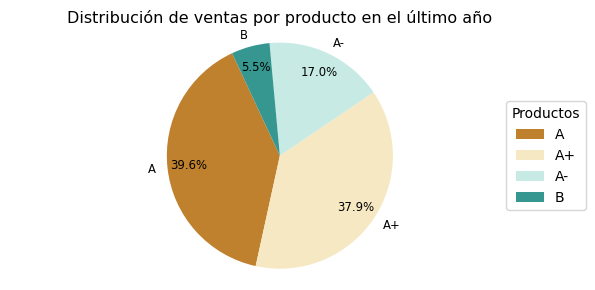

In [42]:
# En primer lugar, como observamos anteriormente, la columna "Fecha" es un
# string, por lo que debemos convertirla a tipo fecha para poder utilizarla.

ventas_limpio['Fecha'] = pd.to_datetime(ventas_limpio['Fecha'], dayfirst=True)

import datetime

# Obtenemos la fecha de hace un año
hace_un_año = pd.Timestamp.today() - pd.DateOffset(years=1)

# Filtramos las ventas del último año
ventas_ultimo_anio = ventas_limpio[ventas_limpio['Fecha'] >= hace_un_año]

# Agrupamos por producto y sumar las cantidades vendidas
ventas_por_producto = ventas_ultimo_anio.groupby('Producto')['Cantidad'].sum()

# Hallamos el producto más vendido
producto_mas_vendido = ventas_por_producto.idxmax()
cantidad_venta_max = ventas_por_producto.max()
print('El producto más vendido en el último año es:')
print(producto_mas_vendido)
print('Cantidad vendida:')
print(cantidad_venta_max)

# Graficamos los resultados
df_ventas_por_producto = ventas_por_producto.to_frame()
df_ventas_por_producto = df_ventas_por_producto.sort_values(by='Cantidad',
                                                            ascending=False)
cantidades_vendidas = df_ventas_por_producto['Cantidad']
productos = df_ventas_por_producto.index
fig, ax = plt.subplots(figsize=(6, 3))
settings = ax.pie(cantidades_vendidas, labels=productos,
                  autopct='%1.1f%%', startangle=115,
                  textprops={'fontsize': 8.4}, pctdistance=0.81,
                  colors=sns.color_palette('BrBG', 4),
                  radius=0.7)
ax.axis('equal')
ax.set_title('Distribución de ventas por producto en el último año',
             fontsize=11.5, loc='center')
ax.legend(labels = productos, title="Productos",
          loc="center right", fontsize=12, bbox_to_anchor=(1, 0, 0.08, 1),
          prop={'size': 10})
plt.tight_layout()
plt.show()

**Respuesta**: El producto más vendido el último año fue el A+. Se vendieron en total 852 unidades.

*1.b Sobre la variedad más vendida del best seller del último año*

La variedad más exitosa del producto más vendido es:
Marfil
Cantidad vendida:
502


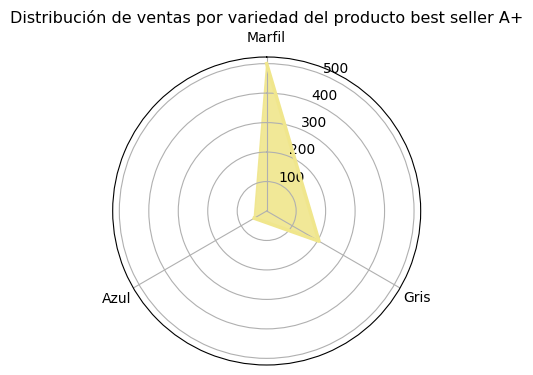

In [43]:
# Para responder esta pregunta, en primer lugar filtramos las ventas del
# último año para el producto más vendido.
ventas_producto_mas_vendido = ventas_ultimo_anio[ventas_ultimo_anio['Producto'] == producto_mas_vendido]

# Agrupamos por variedad y sumamos las cantidades vendidas
ventas_por_variedad = ventas_producto_mas_vendido.groupby('Variedad')['Cantidad'].sum()

# Hallamos la variedad más exitosa
variedad_mas_exitosa = ventas_por_variedad.idxmax()
cantidad_variedad_max = ventas_por_variedad.max()
print('La variedad más exitosa del producto más vendido es:')
print(variedad_mas_exitosa)
print('Cantidad vendida:')
print(cantidad_variedad_max)

# Finalmente, visualizamos las ventas para todas las variedades del
# producto best seller A+ en un gráfico radar
ventas_producto_variedad = ventas_ultimo_anio[['Producto', 'Variedad', 'Cantidad']]
ventas_agrupadas = ventas_producto_variedad.groupby(['Producto', 'Variedad']).sum()
ventas_best_seller_por_variedad = ventas_agrupadas.loc['A+']
ventas_best_seller_ordenadas = ventas_best_seller_por_variedad.sort_values(by='Cantidad',
                                                                           ascending=False)
labels = ['Marfil', 'Gris', 'Azul']
values = ventas_best_seller_ordenadas['Cantidad']
num_vars = len(labels)
angles = np.linspace(0, 2*np.pi, num_vars, endpoint=False).tolist()
fig, ax = plt.subplots(figsize=(4,4), subplot_kw=dict(polar=True))
ax.plot(angles, values, color='khaki', linewidth = 2.5)
ax.fill(angles, values, color='khaki', alpha = 0.9)
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_thetagrids(np.degrees(angles), labels)
ax.set_title('Distribución de ventas por variedad del producto best seller A+',
             fontsize=11.5, loc='center')
plt.show()

**Respuesta**: La variedad más vendida del producto best sellet fue el color Marfil. Se vendieron 557 unidades.

*2. Sobre la performance comercial del best seller en todo el país durante el último año*

El estado con más ventas es:
Colorado
Cantidad vendida:
23


<ipython-input-44-92c2b45c19e7>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_estados, x='Estado', y='Cantidad', palette='BrBG')


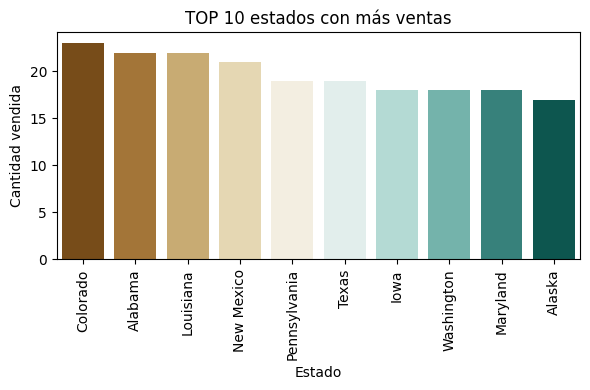

In [44]:
# Para responder esta pregunta primero debemos generar un dataframe que incluya la información geográfica de las ventas
# del último año.
ventas_ultimo_anio_geo = ventas_ultimo_anio[['Producto', 'Variedad', 'Cantidad', 'Estado']]

# Filtramos por el producto best seller A+
ventas_ultimo_anio_geo_best_seller = ventas_ultimo_anio_geo[ventas_ultimo_anio_geo['Producto'] == 'A+']

# Sumamos la cantidad de ventas por estado
ventas_por_estado = ventas_ultimo_anio_geo_best_seller.groupby('Estado')['Cantidad'].sum()

# Hallamos el estado con más ventas del producto A+
estado_con_mas_ventas = ventas_por_estado.idxmax()
cantidad_estado_max = ventas_por_estado.max()
print('El estado con más ventas es:')
print(estado_con_mas_ventas)
print('Cantidad vendida:')
print(cantidad_estado_max)

# Finalmente, graficamos los resultados.
# Con el objetivo de simplificar la visualización tomo únicamente los 10 estados
# con más ventas.
df_ventas_por_estado = ventas_por_estado.to_frame()
ventas_por_estado_ordenadas = df_ventas_por_estado.sort_values(by='Cantidad', ascending=False)
ventas_por_estado_ordenadas = ventas_por_estado_ordenadas.reset_index()
top_10_estados = ventas_por_estado_ordenadas.head(10)
plt.figure(figsize=(6, 4))
sns.barplot(data=top_10_estados, x='Estado', y='Cantidad', palette='BrBG')
plt.xlabel('Estado', fontsize=10)
plt.ylabel('Cantidad vendida', fontsize=10)
plt.title('TOP 10 estados con más ventas', fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**Respuesta**: El estado con más ventas fue Alabama. Se vendieron 25 unidades.

*3. Sobre la existencia de un patrón estacional para el best seller*

<ipython-input-45-0c1f244ca419>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ventas_producto_a['Mes'] = ventas_producto_a['Fecha'].dt.to_period('M')


Los cuatro meses con mayores ventas son:
       Mes  Cantidad
5  2024-01        98
7  2024-03        93
2  2023-10        83
3  2023-11        75


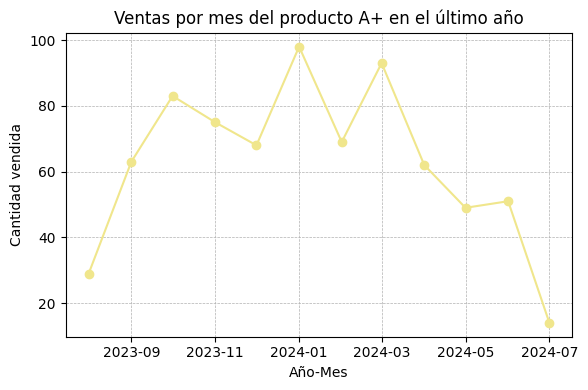

In [45]:
# Partimos del df que ya utilizamos con las ventas del último año
ventas_producto_a = ventas_ultimo_anio[ventas_ultimo_anio['Producto'] == 'A+']

# Creo una nueva columna "Mes" utilizando períodos para sumar las ventas
# por mes
ventas_producto_a['Mes'] = ventas_producto_a['Fecha'].dt.to_period('M')
ventas_por_mes = ventas_producto_a.groupby('Mes')['Cantidad'].sum().reset_index()

# Hallamos los cuatro meses con mayores ventas en el último año
ventas_por_mes_ordenado = ventas_por_mes.sort_values(by='Cantidad', ascending=False)
top_4_meses = ventas_por_mes_ordenado.head(4)
print('Los cuatro meses con mayores ventas son:')
print(top_4_meses)

# Finalmente, graficamos la serie temporal en un gráfico de líneas
ventas_por_mes['Mes'] = ventas_por_mes['Mes'].dt.to_timestamp()
plt.figure(figsize=(6, 4))
plt.plot(ventas_por_mes['Mes'], ventas_por_mes['Cantidad'], marker='o', linestyle='-', color='khaki')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xlabel('Año-Mes')
plt.ylabel('Cantidad vendida')
plt.title('Ventas por mes del producto A+ en el último año')
plt.grid(True)
plt.tight_layout()
plt.show()

**Respuesta**: A partir de los resultados y del gráfico podemos concluir que las ventas tienden a aumentar a medida que se acerca el final del año (el segundo semestre, otoño-invierno) y decaen en la primera mitad (primavera-verano).

*4. Sobre la correlación precio-cantidad para el best seller*

In [47]:
# Para responder esta pregunta, utilizamos el dataframe de ventas del producto
# A+ que creamos en el apartado anterior.
# En primer lugar, verificamos si hay ceros en la columna "Precio"
ceros_precio = ventas_producto_a[ventas_producto_a['Precio'] == 0]

print('Número de filas con Precio = 0:')
print(len(ceros_precio))

Número de filas con Precio = 0:
2


In [49]:
# Para poder avanzar, eliminamos las filas con valor = 0
ventas_producto_a_limpio = ventas_producto_a[(ventas_producto_a['Precio'] != 0) & (ventas_producto_a['Cantidad'] != 0)]
ceros_precio_limpio = ventas_producto_a_limpio[ventas_producto_a_limpio['Precio'] == 0]

print('Número de ceros en columna "Precio" después de limpiar:')
print(len(ceros_precio_limpio))
print('Número de filas después de eliminar ceros:')
print(len(ventas_producto_a_limpio))

Número de ceros en columna "Precio" después de limpiar:
0
Número de filas después de eliminar ceros:
750


La correlación entre el precio y las cantidades vendidas para el producto A+ es:
-0.33143445834304314


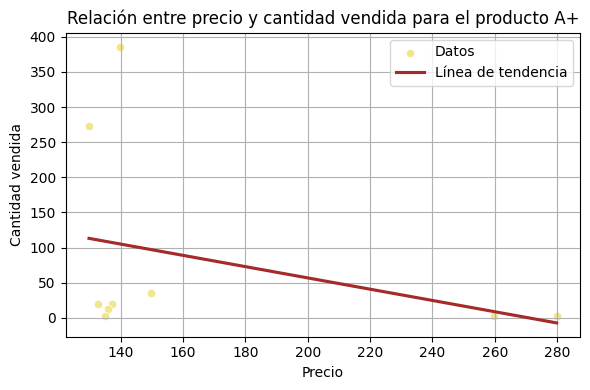

In [50]:
# En este punto, podemos calcular la correlación Precio-Cantidad
# Primero agrupamos todas las ventas para cada precio
ventas_agrupadas = ventas_producto_a_limpio.groupby('Precio', as_index=False)['Cantidad'].sum()
df_ventas_agrupadas = ventas_agrupadas.sort_values(by='Cantidad', ascending=False)
correlacion = ventas_agrupadas[['Precio', 'Cantidad']].corr().iloc[0, 1]
print('La correlación entre el precio y las cantidades vendidas para el producto A+ es:')
print(correlacion)

# Finalmente, podemos graficar nuestro resultado en un gráfico scatter.
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df_ventas_agrupadas, x='Precio', y='Cantidad', color='khaki', label='Datos')

# Agregamos una línea de tendencia para mayor información
sns.regplot(data=ventas_agrupadas, x='Precio', y='Cantidad',
            scatter=False, color='brown', label='Línea de tendencia', ci=None)

# Agregamos detalles adicionales a la visualización
plt.xlabel('Precio')
plt.ylabel('Cantidad vendida')
plt.title('Relación entre precio y cantidad vendida para el producto A+')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**Respuesta**: Como era de esperarse, tanto el cálculo de la correlación como el gráfico muestran que la correlación Precio-Cantidad para el producto A+ es negativa, aunque podemos observar que la pendiente es reducida y por lo tanto, se trata de un producto con demanda muy elástica (o muy sensible a los cambios de precio), lo que también es esperable considerando el rubro en el que se desempeña la empresa.

# Conclusiones del análisis exploratorio inicial

1. **Producto más vendido:**
El análisis de ventas revela que el producto más vendido es el A+ en su variedad "Marfil".


2. **Estado con mayores ventas:**
El estado con las mayores ventas para el producto A+ es Alabama. Además, los resultados indican que la empresa muestra un mejor desempeño comercial en los estados cercanos a sus operaciones en Texas.

3. **Estacionalidad de ventas:**
Se observa una relativa estacionalidad en las ventas del producto A+. El desempeño comercial del producto tiende a mejorar en el segundo semestre del año.

4. **Correlación Precio-Cantidad:**
La correlación entre el precio y la cantidad vendida del producto A+ es negativa. Además, un pequeño aumento en el precio tiende a reducir la cantidad demandada significativamente, lo cual es consistente con las expectativas en el sector en el que opera la empresa.

# Preprocesamiento de datos: One-Hot Encoding

In [61]:
# Comenzamos eliminando las columnas que ya sabemos que no vamos a utilizar
# en nuestro análisis
columnas_a_eliminar = ['Orden', 'Fecha', 'Cliente', 'Destino', 'Trimestre', 'Estado', 'Condicion', 'Envio', 'Categoria', 'SKU', 'ASIN', 'Moneda']
ventas_reducido = ventas_limpio.drop(columns=columnas_a_eliminar)

# Mostramos las primeras filas del nuevo dataset para confirmar el resultado
print(ventas_reducido.head())

   Mes   Año Producto Variedad  Cantidad  Precio
0    1  2022        A   Marfil         1    98.5
1    1  2022        A     Gris         1    98.5
2    1  2022        A     Gris         1    98.5
3    1  2022        A     Gris         1    98.5
4    1  2022        B   Marfil         1    79.9


In [70]:
# Aplicamos One-Hot Encoding a las columnas categóricas en ventas_reducido
ventas_encoded = pd.get_dummies(ventas_reducido).astype(int)

# Mostramos las primeras filas para confirmar el resultado
print(ventas_encoded.head())

   Mes   Año  Cantidad  Precio  Producto_A  Producto_A+  Producto_A-  \
0    1  2022         1      98           1            0            0   
1    1  2022         1      98           1            0            0   
2    1  2022         1      98           1            0            0   
3    1  2022         1      98           1            0            0   
4    1  2022         1      79           0            0            0   

   Producto_B  Variedad_Azul  Variedad_Gris  Variedad_Marfil  Variedad_Premium  
0           0              0              0                1                 0  
1           0              0              1                0                 0  
2           0              0              1                0                 0  
3           0              0              1                0                 0  
4           1              0              0                1                 0  


In [71]:
ventas_encoded.columns

Index(['Mes', 'Año', 'Cantidad', 'Precio', 'Producto_A', 'Producto_A+',
       'Producto_A-', 'Producto_B', 'Variedad_Azul', 'Variedad_Gris',
       'Variedad_Marfil', 'Variedad_Premium'],
      dtype='object')

# Feature selection

In [77]:
# Utilizamos el método backward selection.

# Separamos las variables independientes (X) y la dependiente (y)
X = ventas_encoded.drop(columns=['Cantidad'])
y = ventas_encoded['Cantidad']

# Iniciamos con todas las variables
variables_seleccionadas = X.columns.tolist()
variables_eliminadas = False

# Iteramos hasta que no se puedan eliminar más variables
while len(variables_seleccionadas) > 0:
    X_seleccionadas = sm.add_constant(X[variables_seleccionadas])
    modelo = sm.OLS(y, X_seleccionadas).fit()
    pvalores = modelo.pvalues[1:]

    max_pvalor = pvalores.max()
    if max_pvalor > 0.05:
        peor_variable = pvalores.idxmax()
        print(f'Eliminando {peor_variable} con p-valor de {max_pvalor}')
        variables_seleccionadas.remove(peor_variable)
        variables_eliminadas = True
    else:
        break

if variables_eliminadas:
    print('Se eliminaron variables durante el proceso.')
else:
    print('No se eliminó ninguna variable.')

print('Variables finales seleccionadas:')
print(variables_seleccionadas)

No se eliminó ninguna variable.
Variables finales seleccionadas:
['Mes', 'Año', 'Precio', 'Producto_A', 'Producto_A+', 'Producto_A-', 'Producto_B', 'Variedad_Azul', 'Variedad_Gris', 'Variedad_Marfil', 'Variedad_Premium']


# Modelos a utilizar

Probaremos 4 modelos de regresión:

* **Regresión Lineal:** Empezaremos probando un modelo básico para comparar resultados.

* **Random Forest:** Luego, probaremos un modelo más robusto que pueda manejar bien la complejidad.

* **XGBOOST:** A continuación, probaremos un modelo eficiente y potente para predicciones precisas.

* **Gradient Boosting Regressor:** Finalmente, probaremos un modelo aun más potente que mejora la precisión combinando varios modelos simples.

# Regresión lineal

In [79]:
# Separamos las variables independientes (X) y la dependiente (y)
X = ventas_encoded.drop(columns=['Cantidad'])
y = ventas_encoded['Cantidad']

# Dividimos el dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Creamos el modelo de Regresión Lineal
modeloLR = LinearRegression()

# Entrenamos el modelo
modeloLR.fit(X_train, y_train)

# Realizamos predicciones sobre el conjunto de prueba
y_pred = modeloLR.predict(X_test)

# Calculamos métricas de rendimiento
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Mostramos las métricas para evaluar el modelo
print('MSE:')
print(mse)
print('RMSE:')
print(rmse)
print('MAE:')
print(mae)
print('R2:')
print(r2)

MSE:
0.026699718338457266
RMSE:
0.1634004845110848
MAE:
0.07587421133311777
R2:
0.45962407074965095


# Random Forest

In [80]:
# Separamos las variables independientes (X) y la dependiente (y)
X = ventas_encoded.drop(columns=['Cantidad'])
y = ventas_encoded['Cantidad']

# Dividimos el dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Creamos el modelo de Random Forest
modelo_rf = RandomForestRegressor(random_state=42)

# Entrenamos el modelo
modelo_rf.fit(X_train, y_train)

# Realizamos predicciones sobre el conjunto de prueba
y_pred_rf = modelo_rf.predict(X_test)

# Calculamos métricas de rendimiento
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Mostramos las métricas para evaluar el modelo
print('MSE:')
print(mse_rf)
print('RMSE:')
print(rmse_rf)
print('MAE:')
print(mae_rf)
print('R2:')
print(r2_rf)

MSE:
0.0020107920798841617
RMSE:
0.0448418563385166
MAE:
0.003951730732453624
R2:
0.9593035542576652


# XGBOOST

In [83]:
# Separamos las variables independientes (X) y la dependiente (y)
X = ventas_encoded.drop(columns=['Cantidad'])
y = ventas_encoded['Cantidad']

# Dividimos el dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Creamos el modelo de XGBoost
modelo_xgb = xgb.XGBRegressor(random_state=42)

# Entrenamos el modelo
modelo_xgb.fit(X_train, y_train)

# Realizamos predicciones sobre el conjunto de prueba
y_pred_xgb = modelo_xgb.predict(X_test)

# Calculamos métricas de rendimiento
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

# Mostramos las métricas para evaluar el modelo
print('MSE:')
print(mse_xgb)
print('RMSE:')
print(rmse_xgb)
print('MAE:')
print(mae_xgb)
print('R2:')
print(r2_xgb)

MSE:
0.002331701879067223
RMSE:
0.048287699045069674
MAE:
0.00401097291923431
R2:
0.9528086568680807


# Gradient Boosting Regressor

In [84]:
# Separamos las variables independientes (X) y la dependiente (y)
X = ventas_encoded.drop(columns=['Cantidad'])  # Suponiendo que 'Cantidad' es la variable objetivo
y = ventas_encoded['Cantidad']

# Dividimos el dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Creamos el modelo de Gradient Boosting Regressor
modelo_gbr = GradientBoostingRegressor(random_state=42)

# Entrenamos el modelo
modelo_gbr.fit(X_train, y_train)

# Realizamos predicciones sobre el conjunto de prueba
y_pred_gbr = modelo_gbr.predict(X_test)

# Calculamos métricas de rendimiento
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
rmse_gbr = np.sqrt(mse_gbr)
mae_gbr = mean_absolute_error(y_test, y_pred_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)

# Mostramos las métricas para evaluar el modelo
print('MSE:')
print(mse_gbr)
print('RMSE:')
print(rmse_gbr)
print('MAE:')
print(mae_gbr)
print('R2:')
print(r2_gbr)

MSE:
0.001694942520829416
RMSE:
0.041169679629909875
MAE:
0.004839853115547389
R2:
0.9656960373847882


# Métricas y comparación entre modelos

In [85]:
# Comparamos los resultados de las métricas obtenidas para cada modelo
resultados = {
    'Modelo': ['Regresión Lineal', 'Random Forest', 'XGBoost', 'Gradient Boosting'],
    'MSE': [mse, mse_rf, mse_xgb, mse_gbr],
    'RMSE': [rmse, rmse_rf, rmse_xgb, rmse_gbr],
    'MAE': [mae, mae_rf, mae_xgb, mae_gbr],
    'R²': [r2, r2_rf, r2_xgb, r2_gbr]
}

# Creamos un dataframe con los resultados
df_resultados = pd.DataFrame(resultados)

# Mostramos la comparación de resultados
print(df_resultados)

              Modelo       MSE      RMSE       MAE        R²
0   Regresión Lineal  0.026700  0.163400  0.075874  0.459624
1      Random Forest  0.002011  0.044842  0.003952  0.959304
2            XGBoost  0.002332  0.048288  0.004011  0.952809
3  Gradient Boosting  0.001695  0.041170  0.004840  0.965696


# Conclusiones finales

En este trabajo el algoritmo Gradient Boosting Regressor logró el mejor R² entre los modelos evaluados, por lo que podemos afirmar que es el modelo más eficaz para predecir la demanda de estos productos.

Empezamos el análisis con la detección de datos nulos y el tratamiento de outliers en la columna Cantidad. Eliminamos las filas con cantidad igual a 0, ya que no representaban ventas reales, mientras que mantuvimos otros outliers por ser esperables en el contexto del proyecto. Luego, realizamos un análisis exploratorio inicial que arrojó conclusiones sobre la performance comercial de los productos y que complementamos con visualizaciones.

Para simplificar el dataset, eliminamos las columnas no relevantes, y aplicamos One-Hot Encoding a Producto, Variedad y Mes. En la Feature selection, usamos backward selection y concluimos que todas las variables eran significativas, por lo que no eliminamos ninguna.

Finalmente, implementamos y comparamos los modelos de Regresión Lineal, Random Forest, XGBOOST y Gradient Boosting Regressor. Las métricas de rendimiento, incluyendo MSE, RMSE, MAE y R², confirmaron que el Gradient Boosting Regressor es el modelo más adecuado para este análisis, ofreciendo las predicciones más precisas.
